In [1]:
# import libraries 
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
# Webscrape needed chart
url= 'https://www.the-numbers.com/home-market/distributors'
response = requests.get('https://www.the-numbers.com/home-market/distributors')
soup = BeautifulSoup(response.text, 'lxml')
art_body= soup.find_all('table', id = 'page_filling_chart')
for body in art_body:
    print(art_body.text)

In [3]:
# Confirm webscrape status
response.status_code

200

In [4]:
# Find basic information on chart
df_list = pd.read_html(response.text) 
df_home = df_list[0]
df_home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 3 columns):
Home Market Distributors              614 non-null object
No. of Movies                         614 non-null int64
Total Domestic Home Market Revenue    614 non-null object
dtypes: int64(1), object(2)
memory usage: 14.5+ KB


In [5]:
# pull the first 5 home distributors
df_home.head(15)

,Home Market Distributors,No. of Movies,Total Domestic Home Market Revenue
0,Walt Disney Home Entertainment,388,"$10,723,810,487"
1,Universal Home Entertainment,1236,"$9,480,962,035"
2,Warner Home Video,962,"$9,289,947,358"
3,Fox Home Entertainment,857,"$8,862,951,476"
4,Sony Pictures Home Entertainment,1300,"$7,646,065,095"
5,Paramount Home Video,471,"$5,987,882,889"
6,Lionsgate Home Entertainment,1312,"$4,164,608,183"
7,Buena Vista Home Entertainment,78,"$1,746,787,598"
8,New Line Home Video,104,"$1,197,796,076"
9,Summit Home Video,34,"$1,189,957,871"


In [6]:
# confirm the columns in the chart
df_home.columns

Index(['Home Market Distributors', 'No. of Movies',
       'Total Domestic Home Market Revenue'],
      dtype='object')

In [7]:
# confirm there isn't missing data
df_home.isna().sum()

Home Market Distributors              0
No. of Movies                         0
Total Domestic Home Market Revenue    0
dtype: int64

In [8]:
# Change column[2] into numbers
def money_str_int(str):
    number = int(str.strip('$').replace(',',''))
    return number

In [9]:
# Apply changesv
df_home['Total Domestic Home Market Revenue'] = df_home['Total Domestic Home Market Revenue'].str.replace('$', '')
df_home['Total Domestic Home Market Revenue'] = df_home['Total Domestic Home Market Revenue'].str.replace(',', '')
df_home['Total Domestic Home Market Revenue'] = df_home['Total Domestic Home Market Revenue'].astype(float)
df_home.head()

,Home Market Distributors,No. of Movies,Total Domestic Home Market Revenue
0,Walt Disney Home Entertainment,388,1.072381e+10
1,Universal Home Entertainment,1236,9.480962e+09
2,Warner Home Video,962,9.289947e+09
3,Fox Home Entertainment,857,8.862951e+09
4,Sony Pictures Home Entertainment,1300,7.646065e+09


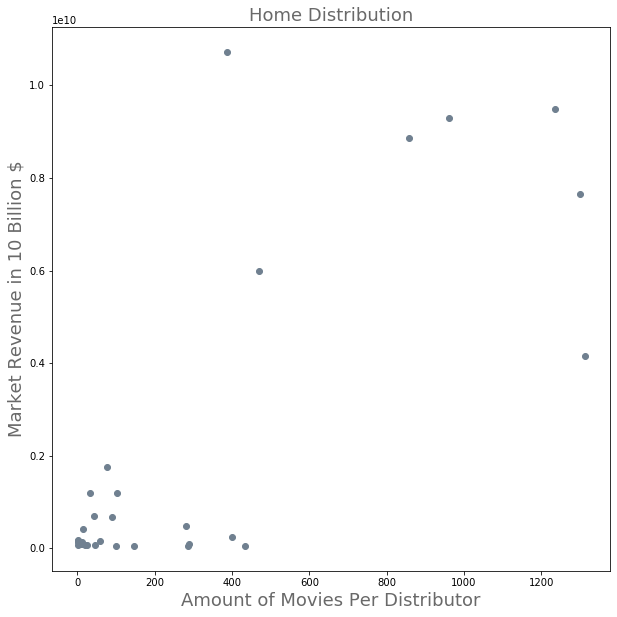

In [10]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np

# apply size restictions
plt.figure(figsize=(10,10))

# create data
y= (df_home.loc[0:30, 'Total Domestic Home Market Revenue']) 
x = (df_home.loc[0:30, 'No. of Movies'])


 
# use the scatter function
plt.scatter( x, y, color= 'slategrey')
plt.title("Home Distribution", fontsize=18, fontweight=0, color='dimgrey')
plt.xlabel("Amount of Movies Per Distributor", fontsize=18, fontweight=0, color='dimgrey')
plt.ylabel("Market Revenue in 10 Billion $", fontsize=18, fontweight=0, color='dimgrey')
plt.savefig('images/home_distribution_chart.png', dpi=300)
plt.show()


In [11]:
#define webiste url and get content
url = 'https://www.the-numbers.com/market/distributors'
r = requests.get(url)
soup = BeautifulSoup(r.content)

In [12]:
#clean up the html code
soup.prettify

<bound method Tag.prettify of <!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-1343128-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-1343128-1');
</script>
<meta content='(PICS-1.1 "https://www.icra.org/ratingsv02.html" l gen true for "https://www.the-numbers.com/" r (cb 1 lz 1 nz 1 oz 1 vz 1) "https://www.rsac.org/ratingsv01.html" l gen true for "https://www.the-numbers.com/" r (n 0 s 0 v 0 l 0))' http-equiv="PICS-Label"/>
<!--<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" >-->
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="telephone=no" name="format-detection"/> <!-- for apple mobile -->
<meta content="521546213" property="fb:admins"/>

In [13]:
#define data as a list
data = []

#find table
results = soup.select('table')[0]

#find all tr elements
rows = results.find_all(['tr'])

#find data in td tags
for row in rows:
    cols = row.find_all('td')
    #get text
    cols = [ele.text.strip() for ele in cols]
    #remove header row
    data.append(cols[1:])

#name columns
cols = ['Distributor', 'Number of Movies', 'Box Office Total', 'Ticket Sales', 'Market Share']

#define dataframe
#remove redundant "Rank" column
df = pd.DataFrame(data[1:], columns = cols)

#return head of table
df.head(8)

,Distributor,Number of Movies,Box Office Total,Ticket Sales,Market Share
0,Walt Disney,574,"$39,694,407,526","5,668,676,902",16.94%
1,Warner Bros.,803,"$35,641,246,799","5,133,326,376",15.21%
2,Sony Pictures,730,"$28,775,433,129","4,257,945,527",12.28%
3,Universal,511,"$27,464,279,056","3,938,555,708",11.72%
4,20th Century Fox,520,"$25,855,030,516","3,792,393,298",11.03%
5,Paramount Pictures,483,"$24,236,244,100","3,647,709,479",10.34%
6,Lionsgate,416,"$9,538,424,750","1,211,612,233",4.07%
7,New Line,207,"$6,194,343,024","1,116,305,898",2.64%


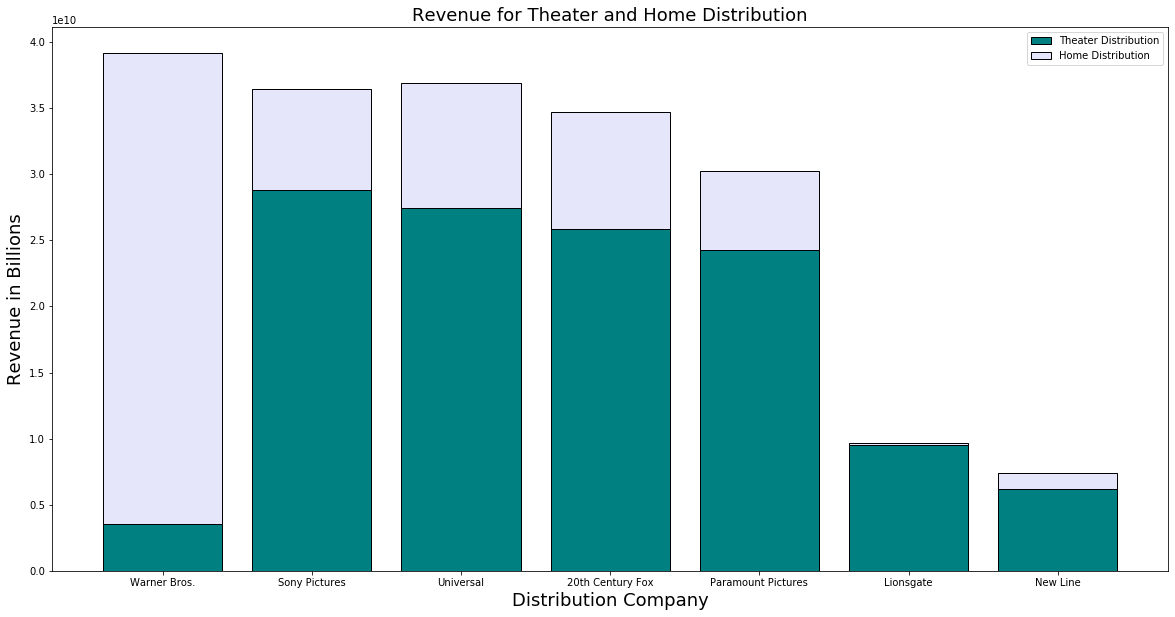

In [14]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# apply size restictions
plt.figure(figsize=(20,10))

 
# Values of each group
bars1 = [3535746799, 28775031704, 27464279056, 25854741898, 24235919096, 9538424750, 6194343024]
bars2 = [35635746799, 7645687205, 9478437927, 8862787530, 5987291353, 142880327, 1197784411]

 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()

# The position of the bars on the x-axis
r = range(len(bars))
 
# Names of group and bar width
names = ['Warner Bros.','Sony Pictures','Universal','20th Century Fox','Paramount Pictures', 'Lionsgate', 'New Line']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color= 'teal', edgecolor='black', width=0.8, label= 'Theater Distribution')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='lavender', edgecolor='black', width= 0.8, label= 'Home Distribution')

# Custom X axis
plt.title("Revenue for Theater and Home Distribution", fontsize=18, fontweight=0, )
plt.xticks(r, names)
plt.xlabel("Distribution Company", fontsize=18, fontweight=0)
plt.ylabel("Revenue in Billions", fontsize=18, fontweight=0)
plt.legend()
edgecolor= 'black'

# Show graphic
plt.show()
